# **Deep Decryption**
Kevin Thompson

## **Part 1: Substitution Cipher**

Stick with lower case and no puncuation

In [0]:
import os
import gc
import math
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, transform
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [0]:
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
letters_cap = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [0]:
class EncryptionDataset(Dataset):
  def __init__(self, data):
    self.data = data
  
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, i):
    return self.data[i]

Spatial locality, convolutional neural nets shouldn't work. I will try, but probably switch to mlp.

In [0]:
class Block(nn.Module):
  def __init__(self, in_size, out_size):
    super(Block, self).__init__()

    self.in_size = in_size
    self.out_size = out_size

    self.identity = nn.Identity()
    self.conv1 = nn.Conv2d(in_size, out_size, kernel_size=3, padding=1)
    self.activation = nn.ReLU()
    self.conv2 = nn.Conv2d(out_size, out_size, kernel_size=3, padding=1)

  def forward(self, x):
    residual = x

    out = self.conv1(x)
    out = self.activation(out)
    out = self.conv2(out)

    if self.in_size != self.out_size:
      residual = self.identity(out)

    out += residual
    out = self.activation(out)

    return out

class ResNet(nn.Module):
  def __init__(self, in_size=20, mid_size=26):
    super(ResNet, self).__init__()

    self.resnet = nn.Sequential(
          Block(in_size=in_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=mid_size),
          Block(in_size=mid_size, out_size=in_size)
    )

  def forward(self, x):
    out = self.resnet(x)
    return out

In [0]:
class MLPSmall(nn.Module):
  def __init__(self, in_size=20*26, mid_size=100, out_size=20*26):
    super(MLPSmall, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_size, out_size)
    )

  def forward(self, x):
    b, h, w = x.shape
    x = x.view(x.size(0), -1)
    out = self.layers(x)
    return out.reshape((b, h, w))

In [0]:
class MLPMedium(nn.Module):
  def __init__(self, in_size=20*26, mid_size=20*26*2, out_size=20*26):
    super(MLPMedium, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, out_size)
    )

  def forward(self, x):
    b, h, w = x.shape
    x = x.view(x.size(0), -1)
    out = self.layers(x)
    return out.reshape((b, h, w))

In [0]:
class MLPLarge(nn.Module):
  def __init__(self, in_size=20*26, mid_size=20*26*2, out_size=20*26):
    super(MLPLarge, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, out_size)
    )

  def forward(self, x):
    b, h, w = x.shape
    x = x.view(x.size(0), -1)
    out = self.layers(x)
    return out.reshape((b, h, w))

In [0]:
class MLPXLarge(nn.Module):
  def __init__(self, in_size=20*26, mid_size=20*26*2, out_size=20*26):
    super(MLPXLarge, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, out_size)
    )

  def forward(self, x):
    b, h, w = x.shape
    x = x.view(x.size(0), -1)
    out = self.layers(x)
    return out.reshape((b, h, w))

In [0]:
class MLPXXLarge(nn.Module):
  def __init__(self, in_size=20*26, mid_size=20*26*5, out_size=20*26):
    super(MLPXXLarge, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, mid_size),
        nn.ReLU(),
        nn.Linear(mid_size, out_size)
    )

  def forward(self, x):
    b, h, w = x.shape
    x = x.view(x.size(0), -1)
    out = self.layers(x)
    return out.reshape((b, h, w))

In [0]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [0]:
print(get_n_params(MLPSmall()))
print(get_n_params(MLPMedium()))
print(get_n_params(MLPLarge()))
print(get_n_params(MLPXLarge()))
print(get_n_params(MLPXXLarge()))

270920
1083160
3248440
5413720
29757520


In [0]:
def oneHotEncode(vec, size=20, dim=26):
  one_hot = np.zeros(shape=(size, dim))
  for i in range(size):
    one_hot[i][vec[i]] = 1
  return torch.tensor(one_hot)

def vecToText(vec):
  text = ''
  for num in vec:
    text += letters[num]
  return text

def textToVec(text):
  vec = []
  for l in text:
    vec.append(letters.index(l))
  return vec

def genData(length, scheme='caesar', size=20, dim=26, seed=False, mix=False):
  data = []
  if seed:
    seed_size = 5
    seedvec = np.array([1, 2, 3, 4, 5])
    for i in range(length):
      vec = np.concatenate((seedvec, np.random.randint(low=0, high=dim, size=size-seed_size)))
      decoded = oneHotEncode(vec=vec, size=size)
      encoded = oneHotEncode(vec=encode(vec, scheme, mix), size=size)
      data.append((encoded, decoded))
  else:
    for i in range(length):
      vec = np.random.randint(low=0, high=dim, size=size)
      decoded = oneHotEncode(vec=vec, size=size)
      encoded = oneHotEncode(vec=encode(vec, scheme, mix), size=size)
      data.append((encoded, decoded))
  return data


def encode(vec, scheme, mix=False):
  if scheme == 'caesar':
    return caesarCipher(vec, mix)
  elif scheme == 'atbash':
    return atbashCipher(vec) # atbash by defination can't be seeded differently
  elif scheme == 'railfence':
    return railFenceCipher(vec) # rail fence would have a hard time with dimensions with random seeds
  elif scheme == 'columnar':
    return columnarCipher(vec, mix) # seeding this would be hard
  elif scheme == 'doublecolumnar':
    return columnarCipher(columnarCipher(vec, key='code'), key='kevin') # Can't easily mix this one, would have to generate many keys
  elif scheme == 'vigenere':
    return vigenereCipher(vec, mix)
  elif scheme == 'enigma':
    return textToVec(enigmaCipher(vec, mix))

def caesarCipher(vec, mix=False, dim=26, rot=6):
  if mix:
    rot = np.random.randint(1,6)
  return np.array([(x+rot)%dim for x in vec])
  
def atbashCipher(vec, dim=26):
  return np.array([dim-x-1 for x in vec])
  
def railFenceCipher(vec, dim=26, key=4):
  result = []
  matrix = [[-1 for x in range(len(vec))] for y in range(key)]
  i, r, c = 1, 0, 0
  for n in vec:
    if r + i < 0 or r + i >= len(matrix):
      i *= -1
    matrix[r][c] = n
    r += i
    c += 1
  for r in matrix:
    for c in r:
      if c != -1:
        result.append(c)
  return np.array(result)

keys = ['code', 'beef', 'rent', 'head', 'line']
def columnarCipher(vec, mix=False, key='code'): # key lengths of 2, 4, 5, 10 only
  if mix:
    key = keys[np.random.randint(0, 5)]
  pattern = np.array([key.index(x) for x in sorted(key)])
  result = []
  matrix = vec.reshape((len(vec) // len(key), len(key)))
  for i in pattern:
    for j in range(len(matrix)):
      result.append(matrix[j][i])
  return np.array(result)

def vigenereCipher(vec, mix=False, dim=26):
  if mix:
    rots = np.random.randint(low=0, high=5, size=5)
  else:
    rots = np.array([1,2,3,4,5])
  result = []
  cipher = 0
  for l in vec:
    result.append((l+rots[cipher])%dim)
    cipher = (cipher + 1) % len(rots)
  return result

def enigmaCipher(vec, mix=False, reflector=0, ringSettings='ABC', ringPositions='DEF', plugboard='AT BS DE FM IR KN LZ OW PV XY'):
  if mix:
    ringSettings = vecToText(np.random.randint(low=0, high=26, size=3)).upper()
    ringPositions= vecToText(np.random.randint(low=0, high=26, size=3)).upper()
    reflector = np.random.randint(0, 1)
    plugboardSet = set()
    while len(plugboardSet) < 20:
      plugboardSet.add(np.random.randint(0, 26))
    plugboard = ''

    counter = 0
    for num in plugboardSet:
      counter += 1
      plugboard += letters[num]
      if counter % 2 == 0:
        plugboard += ' '

    plugboard.strip()
    plugboard = plugboard.upper()

  plaintext = vecToText(vec)

  rotor1 = "EKMFLGDQVZNTOWYHXUSPAIBRCJ"
  rotor1Notch = "Q"
  rotor2 = "AJDKSIRUXBLHWTMCQGZNPYFVOE"
  rotor2Notch = "E"
  rotor3 = "BDFHJLCPRTXVZNYEIWGAKMUSQO"
  rotor3Notch = "V"
  rotor4 = "ESOVPZJAYQUIRHXLNFTGKDCMWB"
  rotor4Notch = "J"
  rotor5 = "VZBRGITYUPSDNHLXAWMJQOFECK"
  rotor5Notch = "Z" 
  
  rotorDict = {"I":rotor1,"II":rotor2,"III":rotor3,"IV":rotor4,"V":rotor5}
  rotorNotchDict = {"I":rotor1Notch,"II":rotor2Notch,"III":rotor3Notch,"IV":rotor4Notch,"V":rotor5Notch}  
  
  reflectorB = {"A":"Y","Y":"A","B":"R","R":"B","C":"U","U":"C","D":"H","H":"D","E":"Q","Q":"E","F":"S","S":"F","G":"L","L":"G","I":"P","P":"I","J":"X","X":"J","K":"N","N":"K","M":"O","O":"M","T":"Z","Z":"T","V":"W","W":"V"}
  reflectorC = {"A":"F","F":"A","B":"V","V":"B","C":"P","P":"C","D":"J","J":"D","E":"I","I":"E","G":"O","O":"G","H":"Y","Y":"H","K":"R","R":"K","L":"Z","Z":"L","M":"X","X":"M","N":"W","W":"N","Q":"T","T":"Q","S":"U","U":"S"}
  
  alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  rotorANotch = False
  rotorBNotch = False
  rotorCNotch = False
  
  if reflector == 0:
    reflectorDict = reflectorB
  else:
    reflectorDict = reflectorC
  
  rotorA = rotorDict['I']
  rotorB = rotorDict['II']
  rotorC = rotorDict['III']
  rotorANotch = rotorNotchDict['I']
  rotorBNotch = rotorNotchDict['II']
  rotorCNotch = rotorNotchDict['III']
  
  rotorALetter = ringPositions[0]
  rotorBLetter = ringPositions[1]
  rotorCLetter = ringPositions[2]
  
  rotorASetting = ringSettings[0]
  offsetASetting = alphabet.index(rotorASetting)
  rotorBSetting = ringSettings[1]
  offsetBSetting = alphabet.index(rotorASetting)
  rotorCSetting = ringSettings[2]
  offsetCSetting = alphabet.index(rotorASetting)
  
  rotorA = enigmaCaesarShift(rotorA,offsetASetting)
  rotorB = enigmaCaesarShift(rotorB,offsetBSetting)
  rotorC = enigmaCaesarShift(rotorC,offsetCSetting)
  
  if offsetASetting>0:
    rotorA = rotorA[26-offsetASetting:] + rotorA[0:26-offsetASetting]
  if offsetBSetting>0:
    rotorB = rotorB[26-offsetBSetting:] + rotorB[0:26-offsetBSetting]
  if offsetCSetting>0:
    rotorC = rotorC[26-offsetCSetting:] + rotorC[0:26-offsetCSetting]

  ciphertext = ''
  
  #Converplugboard settings into a dictionary
  plugboardConnections = plugboard.upper().split(" ")
  plugboardDict = {}
  for pair in plugboardConnections:
    if len(pair)==2:
      plugboardDict[pair[0]] = pair[1]
      plugboardDict[pair[1]] = pair[0]
  
  plaintext = plaintext.upper()  
  for letter in plaintext:
    encryptedLetter = letter  
    
    if letter in alphabet:
      #Rotate Rotors - This happens as soon as a key is pressed, before encrypting the letter!
      rotorTrigger = False
      #Third rotor rotates by 1 for every key being pressed
      if rotorCLetter == rotorCNotch:
        rotorTrigger = True 
      rotorCLetter = alphabet[(alphabet.index(rotorCLetter) + 1) % 26]
      #Check if rotorB needs to rotate
      if rotorTrigger:
        rotorTrigger = False
        if rotorBLetter == rotorBNotch:
          rotorTrigger = True 
        rotorBLetter = alphabet[(alphabet.index(rotorBLetter) + 1) % 26]
  
        #Check if rotorA needs to rotate
        if (rotorTrigger):
          rotorTrigger = False
          rotorALetter = alphabet[(alphabet.index(rotorALetter) + 1) % 26]
          
      else:
          #Check for double step sequence!
        if rotorBLetter == rotorBNotch:
          rotorBLetter = alphabet[(alphabet.index(rotorBLetter) + 1) % 26]
          rotorALetter = alphabet[(alphabet.index(rotorALetter) + 1) % 26]
        
      #Implement plugboard encryption!
      if letter in plugboardDict.keys():
        if plugboardDict[letter]!="":
          encryptedLetter = plugboardDict[letter]
    
      #Rotors & Reflector Encryption
      offsetA = alphabet.index(rotorALetter)
      offsetB = alphabet.index(rotorBLetter)
      offsetC = alphabet.index(rotorCLetter)

      # Wheel 3 Encryption
      pos = alphabet.index(encryptedLetter)
      let = rotorC[(pos + offsetC)%26]
      pos = alphabet.index(let)
      encryptedLetter = alphabet[(pos - offsetC +26)%26]
      
      # Wheel 2 Encryption
      pos = alphabet.index(encryptedLetter)
      let = rotorB[(pos + offsetB)%26]
      pos = alphabet.index(let)
      encryptedLetter = alphabet[(pos - offsetB +26)%26]
      
      # Wheel 1 Encryption
      pos = alphabet.index(encryptedLetter)
      let = rotorA[(pos + offsetA)%26]
      pos = alphabet.index(let)
      encryptedLetter = alphabet[(pos - offsetA +26)%26]
      
      # Reflector encryption!
      if encryptedLetter in reflectorDict.keys():
        if reflectorDict[encryptedLetter]!="":
          encryptedLetter = reflectorDict[encryptedLetter]
      
      #Back through the rotors 
      # Wheel 1 Encryption
      pos = alphabet.index(encryptedLetter)
      let = alphabet[(pos + offsetA)%26]
      pos = rotorA.index(let)
      encryptedLetter = alphabet[(pos - offsetA +26)%26] 
      
      # Wheel 2 Encryption
      pos = alphabet.index(encryptedLetter)
      let = alphabet[(pos + offsetB)%26]
      pos = rotorB.index(let)
      encryptedLetter = alphabet[(pos - offsetB +26)%26]
      
      # Wheel 3 Encryption
      pos = alphabet.index(encryptedLetter)
      let = alphabet[(pos + offsetC)%26]
      pos = rotorC.index(let)
      encryptedLetter = alphabet[(pos - offsetC +26)%26]
      
      #Implement plugboard encryption!
      if encryptedLetter in plugboardDict.keys():
        if plugboardDict[encryptedLetter]!="":
          encryptedLetter = plugboardDict[encryptedLetter]

    ciphertext = ciphertext + encryptedLetter
  
  return ciphertext.lower()

def enigmaCaesarShift(str, amount):
	output = ""

	for i in range(0,len(str)):
		c = str[i]
		code = ord(c)
		if ((code >= 65) and (code <= 90)):
			c = chr(((code - 65 + amount) % 26) + 65)
		output = output + c
	
	return output

In [0]:
def printInfo(model, train_loss, val_loss, train_acc, val_acc, test_loader):
  print()
  print()
  
  fig, ax = plt.subplots(2,2)
  fig.set_size_inches(10, 10)


  ax[0,0].plot(train_loss)
  ax[0,0].set_title('Training Losses')

  ax[0,1].plot(val_loss)
  ax[0,1].set_title('Validation Losses')

  ax[1,0].plot(train_acc)
  ax[1,0].set_title('Training Accuracies')

  ax[1,1].plot(val_acc)
  ax[1,1].set_title('Validation Accuracies')

  plt.show()

def validate(model, validate_loader, objective):
  val_losses = 0
  val_accs = 0
  val_counter = 0

  for batch, (x, y_truth) in enumerate(validate_loader):
    x, y_truth = x.cuda(async=True), y_truth.cuda(async=True)
    x, y_truth = x.float(), y_truth.float()
    y_hat = model(x)

    val_losses += objective(y_hat, y_truth).item()
    val_accs += (y_hat.argmax(2) == y_truth.argmax(2).long()).float().mean().item()
    val_counter += 1

  return (val_losses / val_counter), (val_accs / val_counter)

def scope(model, train_loader, validate_loader, epochs, val_freq=20):
  objective = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-4)
  gc.collect()
  model.cuda()

  epoch_counter = 0
  last_val_acc = 0
  max_val_acc = 0
  max_train_acc = 0
  break_count = 0
  train_loss = []
  val_loss = []
  train_acc = []
  val_acc = []
  loop = tqdm(total=(len(train_loader)*epochs), position=0, leave=False)
  for epoch in range(epochs):
    epoch_counter += 1
    tl = 0
    ta = 0
    tc = 0
    for batch, (x, y_truth) in enumerate(train_loader):
      x, y_truth = x.cuda(async=True), y_truth.cuda(async=True)
      x, y_truth = x.float(), y_truth.float()
      optimizer.zero_grad()
      y_hat = model(x)
      loss = objective(y_hat, y_truth)
      loss.float().backward()
      optimizer.step()
      
      accuracy = (y_hat.argmax(2) == y_truth.argmax(2).long()).float().mean().item()
      loop.set_description('epoch:{}, break_count:{}, loss:{:.4f}, accuracy:{:.3f}, val_acc:{:.3f}'.format(epoch, break_count, loss.item(), accuracy, last_val_acc))
      loop.update(1)

      tl += loss.item()
      ta += accuracy
      tc += 1
      
    train_loss.append(tl / tc)
    train_acc.append(ta / tc)
    vl, va = validate(model, validate_loader, objective)
    val_loss.append(vl)
    val_acc.append(va)
    last_val_acc = va
    break_count += 1

    if val_acc[-1] > max_val_acc:
      max_val_acc = val_acc[-1]
      break_count = 0
    if train_acc[-1] > max_train_acc:
      max_train_acc = train_acc[-1]
    if break_count > 100:
      break

    if last_val_acc == 1:
      break

  printInfo(model, train_loss, val_loss, train_acc, val_acc, validate_loader)
  return epoch_counter, last_val_acc

def getLoaders(lengths, scheme, size, dim, batch_size=100, seed=False, mix=False):
  train_length, validate_length = lengths

  train_data = genData(train_length, scheme, size, dim, seed, mix)
  validate_data = genData(validate_length, scheme, size, dim, seed, mix)
  
  train_dataset = EncryptionDataset(train_data)
  validate_dataset = EncryptionDataset(validate_data)

  train_loader = DataLoader(
      train_dataset,
      batch_size=batch_size,
      pin_memory=True
  )
  validate_loader = DataLoader(
      validate_dataset,
      batch_size=batch_size,
      pin_memory=True
  )

  return train_loader, validate_loader

Lowered levels to get better results

epoch:836, break_count:2, loss:0.0018, accuracy:1.000, val_acc:1.000:  84%|████████▎ | 6695/8000 [00:36<00:06, 199.17it/s]

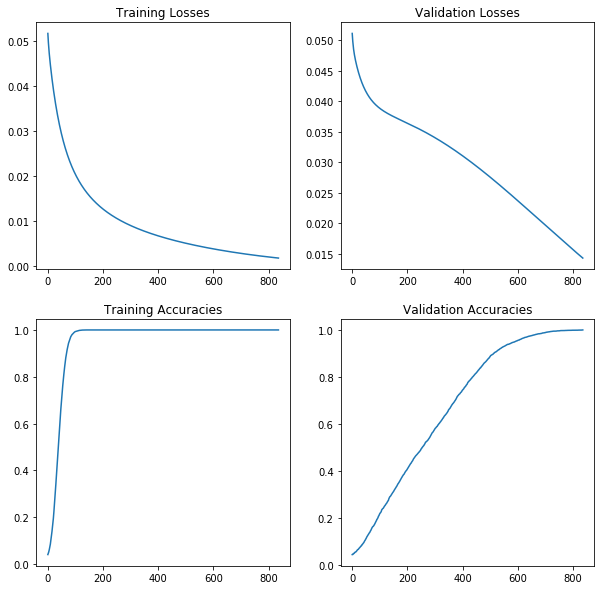

(837, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'caesar'
batch_size = 100

caesar_train_loader, caesar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, caesar_train_loader, caesar_validate_loader, 1000)

epoch:842, break_count:23, loss:0.0018, accuracy:1.000, val_acc:1.000:  84%|████████▍ | 6743/8000 [00:35<00:06, 187.62it/s]

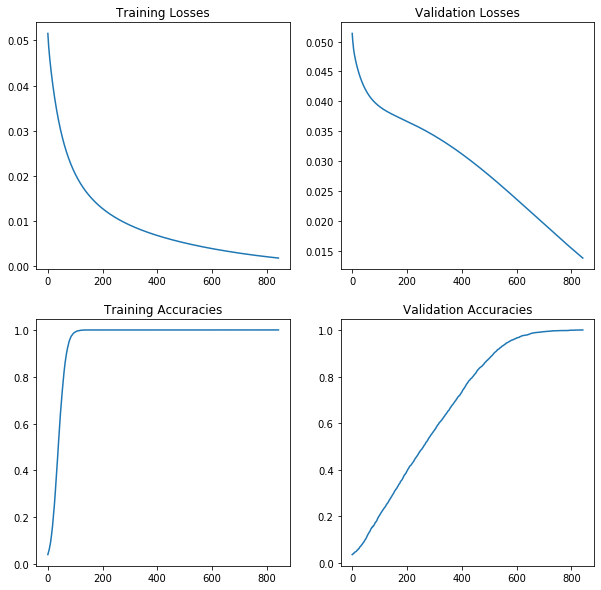

(843, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'atbash'
batch_size = 100

atbash_train_loader, atbash_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, atbash_train_loader, atbash_validate_loader, 1000)

epoch:118, break_count:100, loss:0.0226, accuracy:0.958, val_acc:0.194:  12%|█▏        | 9519/80000 [00:57<06:55, 169.56it/s]

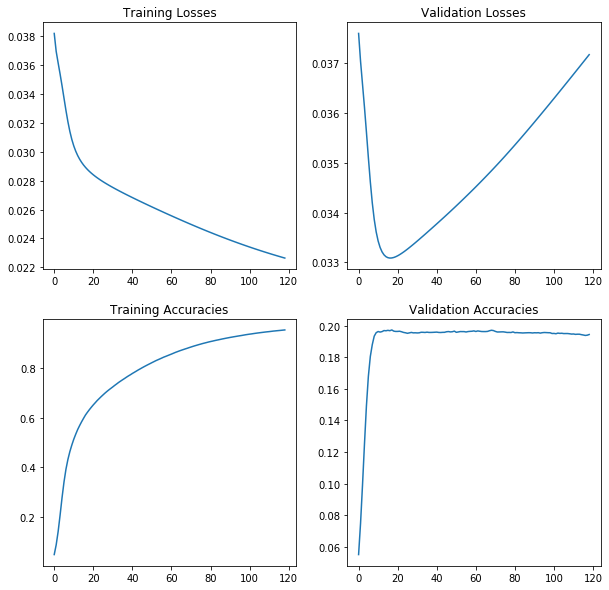

(119, 0.19437500983476638)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'caesar'
batch_size = 100

caesar_train_loader, caesar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=True)
model = MLPMedium()

scope(model, caesar_train_loader, caesar_validate_loader, 1000)

epoch:100, break_count:8, loss:0.0050, accuracy:1.000, val_acc:1.000:  10%|█         | 8079/80000 [00:48<07:20, 163.30it/s]

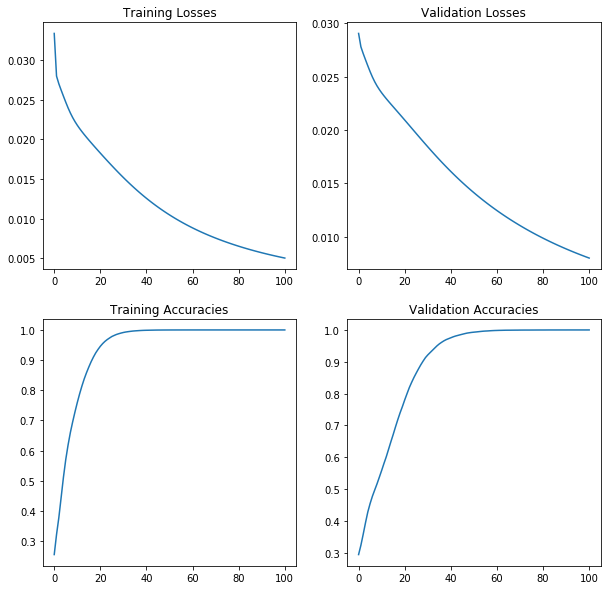

(101, 1.0)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'caesar'
batch_size = 100

caesar_train_loader, caesar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPMedium()

scope(model, caesar_train_loader, caesar_validate_loader, 1000)

epoch:842, break_count:0, loss:0.0017, accuracy:1.000, val_acc:1.000:  84%|████████▍ | 6743/8000 [00:35<00:06, 197.25it/s]

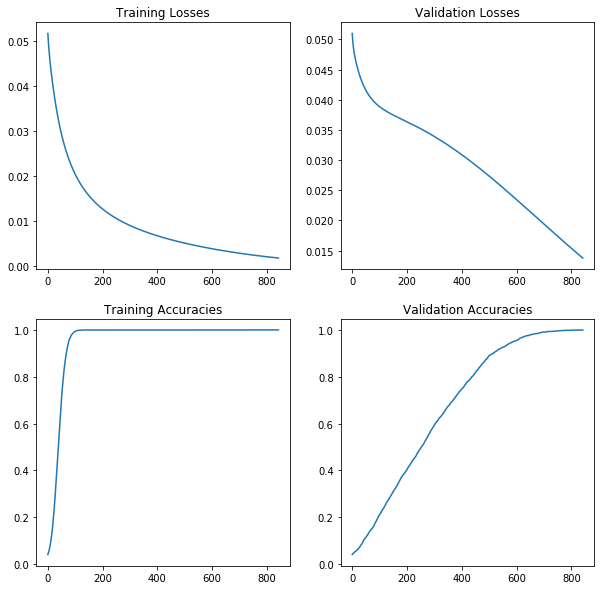

(843, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'railfence'
batch_size = 100

railfence_train_loader, railfence_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, railfence_train_loader, railfence_validate_loader, 1000)

epoch:921, break_count:84, loss:0.0013, accuracy:1.000, val_acc:1.000:  92%|█████████▏| 7375/8000 [00:39<00:03, 184.05it/s]

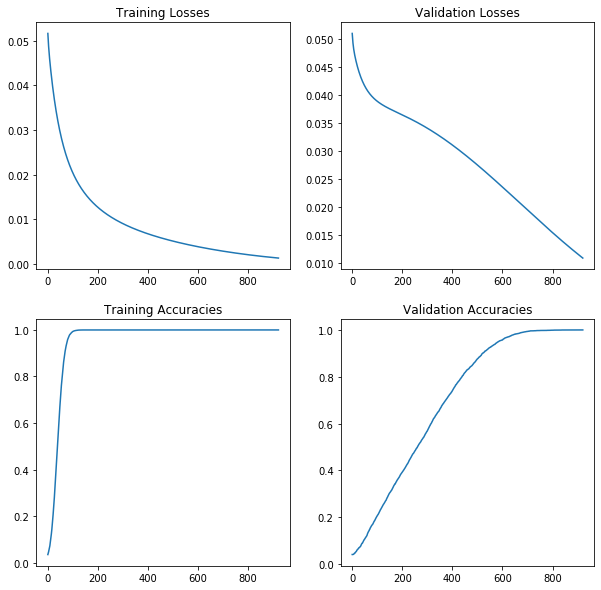

(922, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'columnar'
batch_size = 100

columnar_train_loader, columnar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, columnar_train_loader, columnar_validate_loader, 1000)

epoch:913, break_count:100, loss:0.0013, accuracy:1.000, val_acc:1.000:  91%|█████████▏| 7311/8000 [00:39<00:03, 172.30it/s]

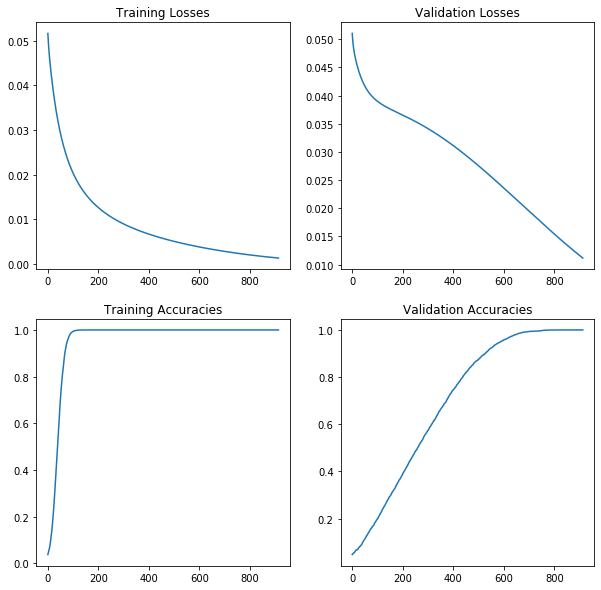

(914, 0.999750018119812)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'doublecolumnar'
batch_size = 100

dcolumnar_train_loader, dcolumnar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, dcolumnar_train_loader, dcolumnar_validate_loader, 1000)

epoch:163, break_count:100, loss:0.0187, accuracy:0.845, val_acc:0.433:  16%|█▋        | 13119/80000 [01:18<06:28, 172.16it/s]

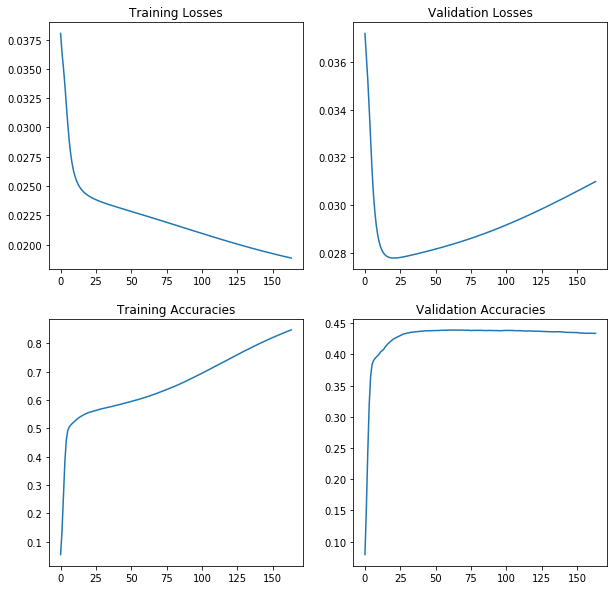

(164, 0.4334750220179558)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'columnar'
batch_size = 100

columnar_train_loader, columnar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=True)
model = MLPMedium()

scope(model, columnar_train_loader, columnar_validate_loader, 1000)

epoch:249, break_count:100, loss:0.0016, accuracy:0.988, val_acc:0.960:  25%|██▍       | 39999/160000 [04:52<14:04, 142.10it/s]

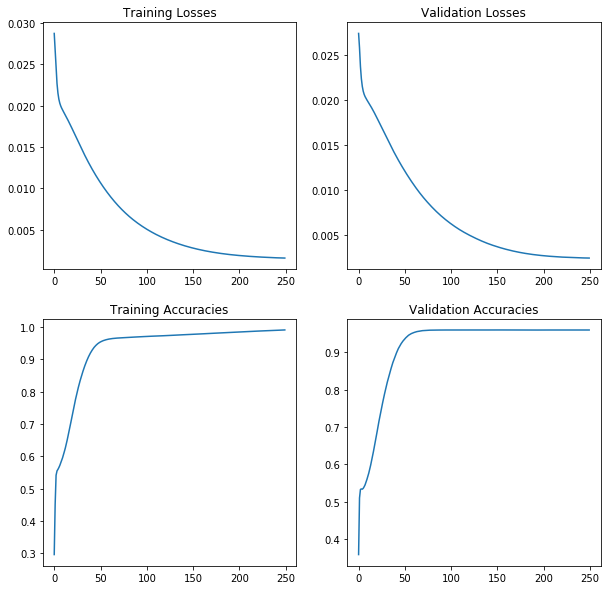

(250, 0.9601125463843345)

In [0]:
train_length = 16000
validate_length = 4000
size = 20
dim = len(letters)
scheme = 'columnar'
batch_size = 100

columnar_train_loader, columnar_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPLarge()

scope(model, columnar_train_loader, columnar_validate_loader, 1000)

epoch:803, break_count:0, loss:0.0020, accuracy:1.000, val_acc:1.000:  80%|████████  | 6431/8000 [00:34<00:08, 188.22it/s]

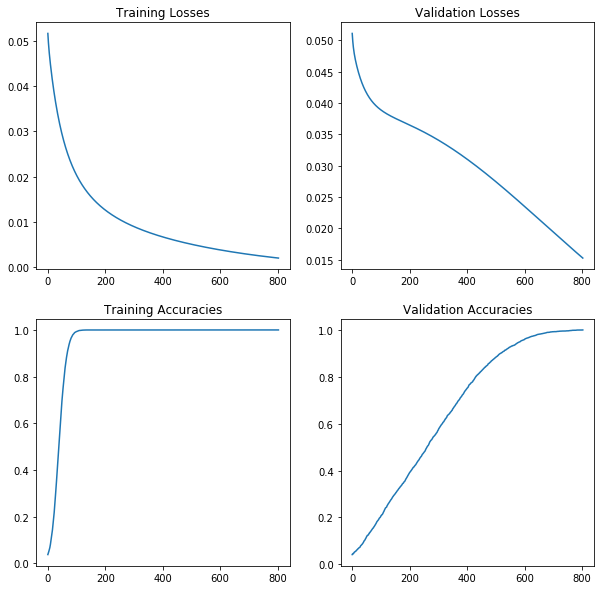

(804, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'vigenere'
batch_size = 100

vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:902, break_count:95, loss:0.0014, accuracy:1.000, val_acc:1.000:  90%|█████████ | 7223/8000 [00:39<00:04, 189.15it/s]

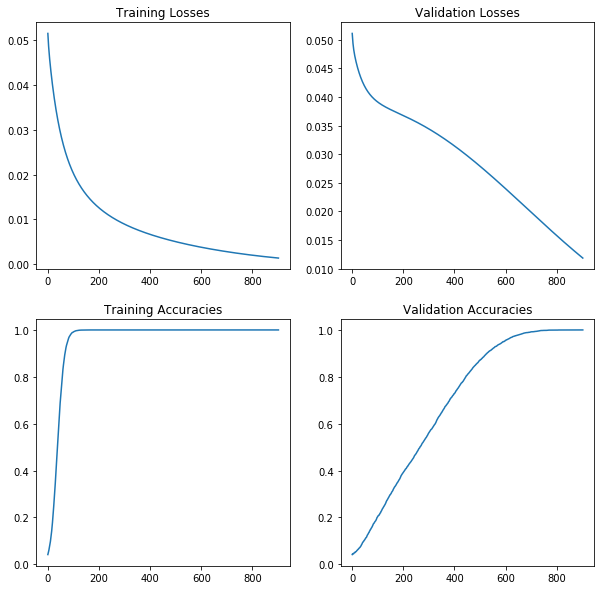

(903, 1.0)

In [0]:
train_length = 800
validate_length = 200
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size)
model = MLPSmall()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:187, break_count:100, loss:0.0192, accuracy:0.986, val_acc:0.040:  19%|█▉        | 15039/80000 [02:10<08:48, 123.03it/s]

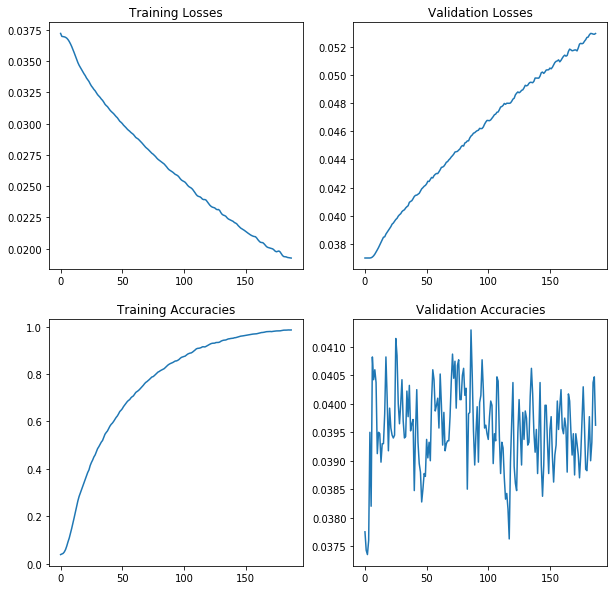

(188, 0.03962500169873238)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=True)
model = MLPXLarge()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:238, break_count:100, loss:0.0106, accuracy:0.991, val_acc:0.280:  24%|██▍       | 38239/160000 [05:29<17:09, 118.31it/s]

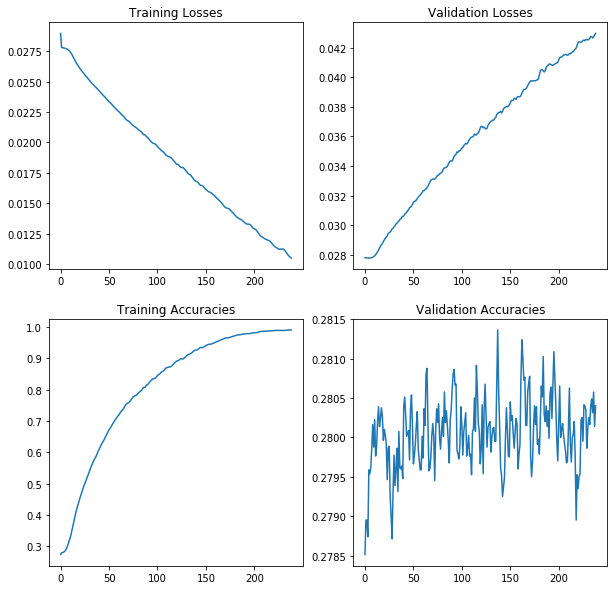

(239, 0.280400013178587)

In [0]:
train_length = 16000
validate_length = 4000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPXLarge()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:124, break_count:100, loss:0.0060, accuracy:1.000, val_acc:0.279:  12%|█▏        | 19999/160000 [04:38<32:25, 71.96it/s]

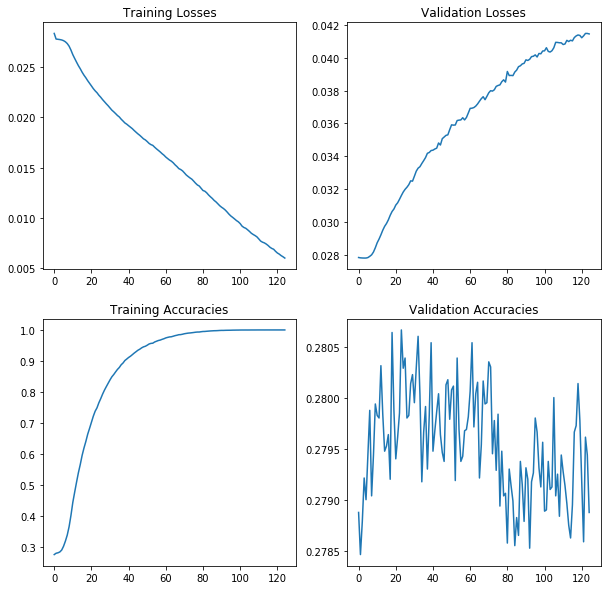

(125, 0.27887501046061514)

In [0]:
train_length = 16000
validate_length = 4000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPXXLarge()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:349, loss0.0072, accuracy:1.000, val_acc:0.495:  35%|███▍      | 27999/80000 [03:01<05:34, 155.63it/s]

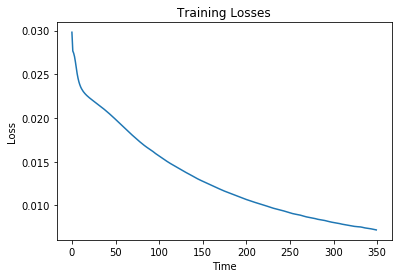

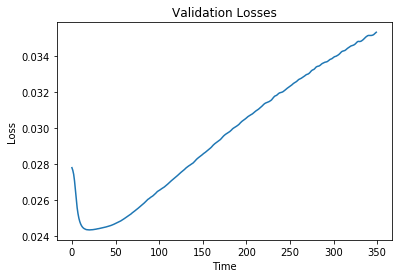

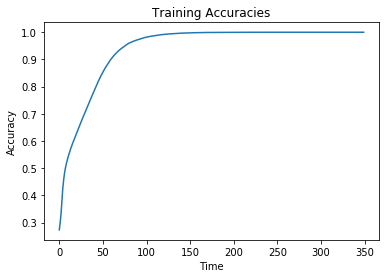

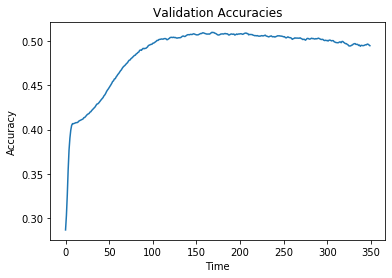

(350, 0.494550022482872)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'vigenere'
batch_size = 100

vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPLarge()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:812, loss0.0012, accuracy:1.000, val_acc:1.000:  81%|████████▏ | 130079/160000 [14:18<03:37, 137.40it/s]

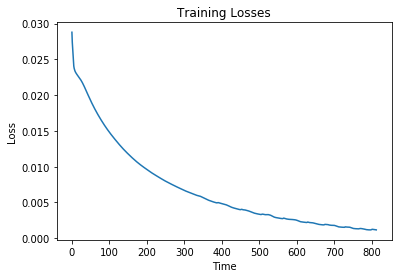

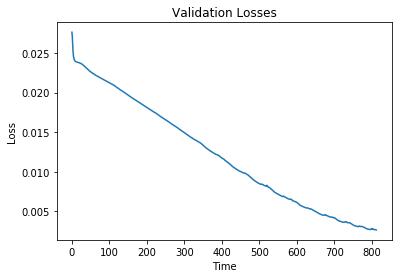

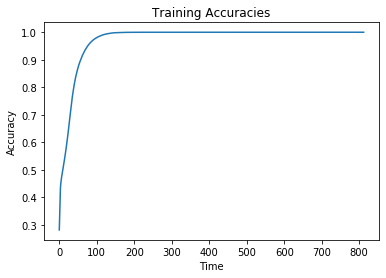

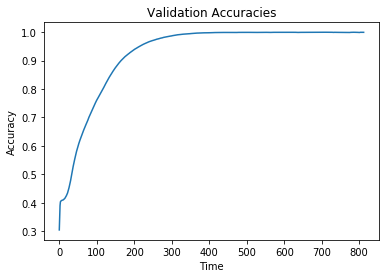

(813, 0.9995000317692757)

In [0]:
train_length = 16000
validate_length = 4000
size = 20
dim = len(letters)
scheme = 'vigenere'
batch_size = 100

vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPLarge()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:999, loss0.0020, accuracy:1.000, val_acc:0.735: 100%|█████████▉| 159999/160000 [20:41<00:00, 148.05it/s]

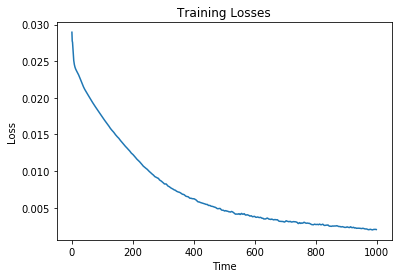

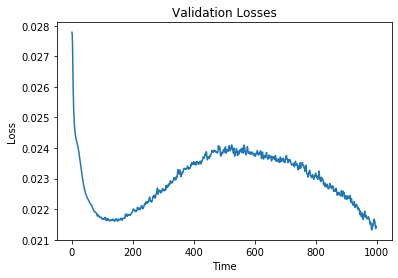

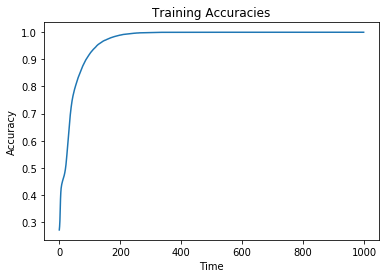

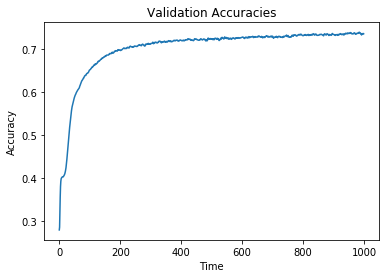

(1000, 0.7355250388383865)

In [0]:
train_length = 16000
validate_length = 4000
size = 20
dim = len(letters)
scheme = 'vigenere'
batch_size = 100

vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPXLarge()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:201, break_count:0, loss0.0056, accuracy:1.000, val_acc:1.000:  20%|██        | 32320/160000 [02:47<10:15, 207.51it/s]

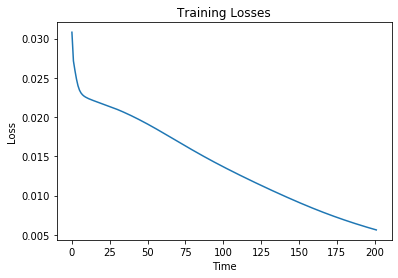

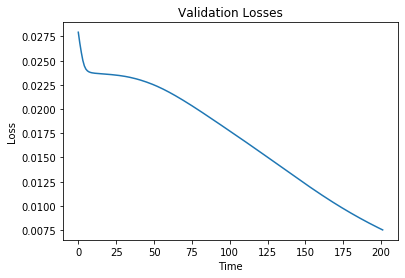

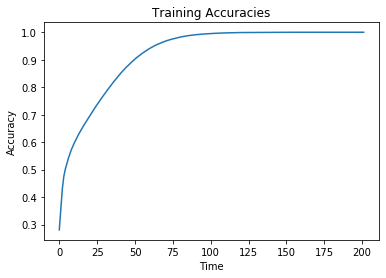

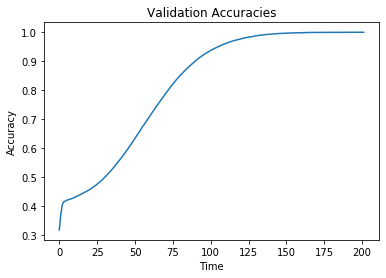

(202, 1.0)

In [0]:
# train_length = 16000
# validate_length = 4000
# size = 20
# dim = len(letters)
# scheme = 'vigenere'
# batch_size = 100

# vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPMedium()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:999, break_count:0, loss0.0085, accuracy:1.000, val_acc:0.852: 100%|█████████▉| 79999/80000 [06:46<00:00, 211.98it/s]

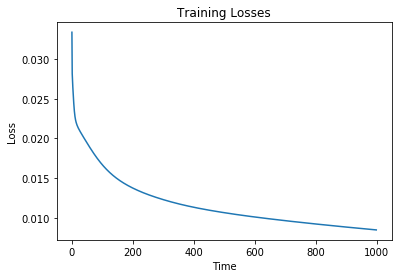

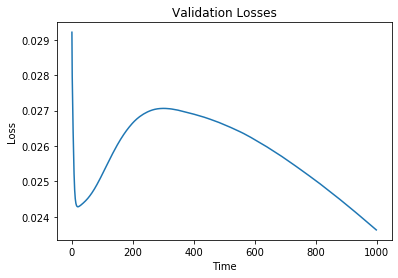

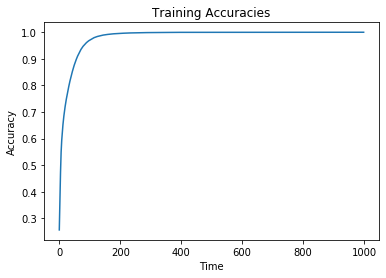

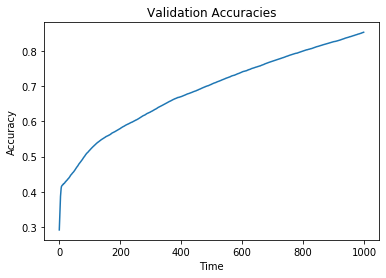

(1000, 0.8525500386953354)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'vigenere'
batch_size = 100

vigenere_train_loader, vigenere_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPMedium()

scope(model, vigenere_train_loader, vigenere_validate_loader, 1000)

epoch:179, break_count:100, loss:0.0347, accuracy:0.254, val_acc:0.039:  18%|█▊        | 14399/80000 [01:02<04:27, 245.16it/s]

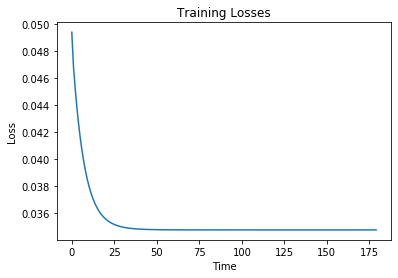

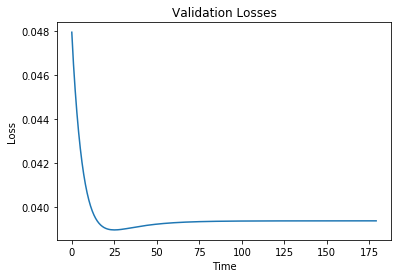

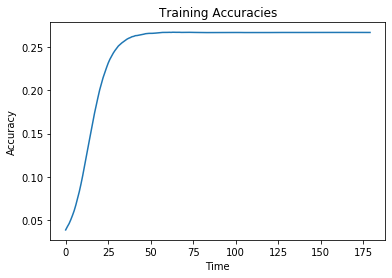

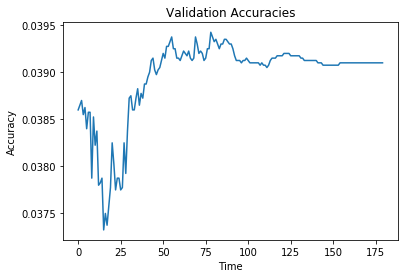

(180, 0.03910000203177333)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=True)
model = MLPSmall()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:999, break_count:2, loss:0.0204, accuracy:0.987, val_acc:0.039: 100%|█████████▉| 79999/80000 [06:35<00:00, 209.71it/s]

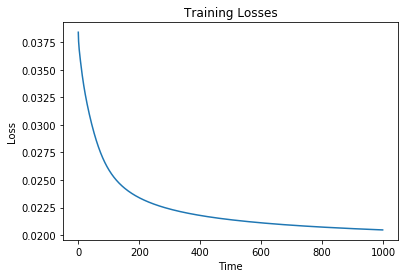

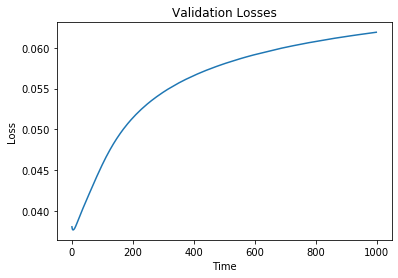

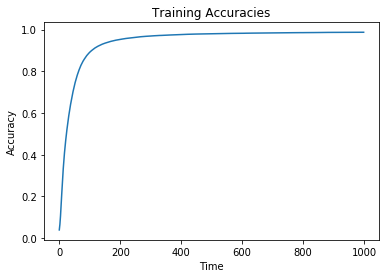

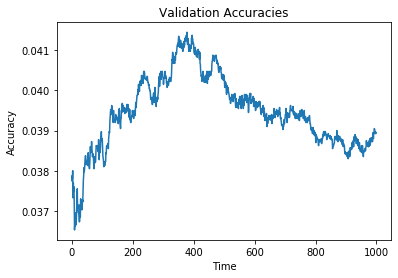

(1000, 0.03895000163465738)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=True)
model = MLPMedium()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:999, break_count:2, loss:0.0140, accuracy:0.997, val_acc:0.280: 100%|█████████▉| 79999/80000 [06:31<00:00, 214.01it/s]

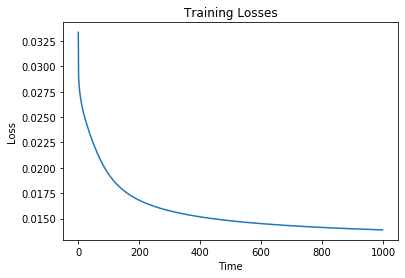

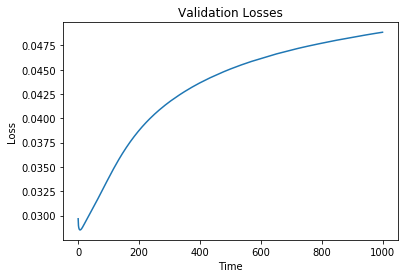

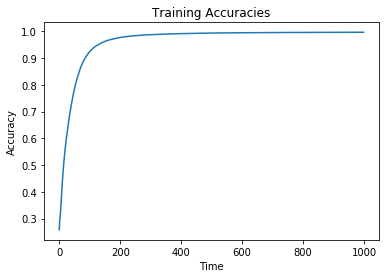

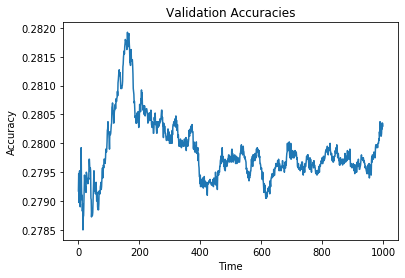

(1000, 0.28030001670122145)

In [0]:
train_length = 8000
validate_length = 2000
size = 20
dim = len(letters)
scheme = 'enigma'
batch_size = 100

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPMedium()

scope(model, enigma_train_loader, enigma_validate_loader, 1000)

epoch:101, break_count:100, loss:0.0277, accuracy:0.287, val_acc:0.044:   1%|          | 4080/400000 [22:30<33:52:36,  3.25it/s]

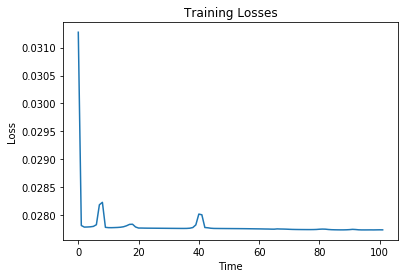

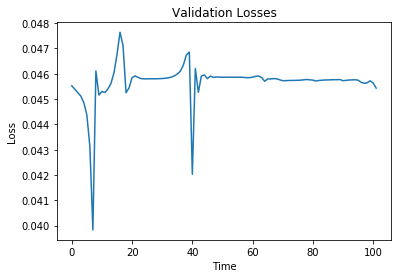

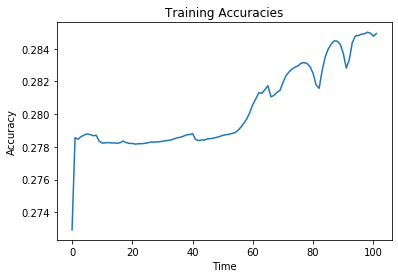

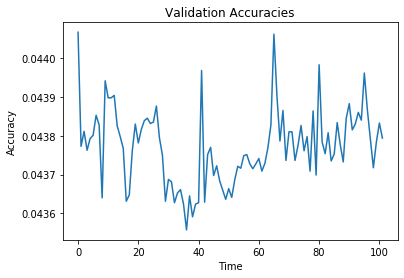

(102, 0.04379374869167805)

In [0]:
train_length = 16000
validate_length = 4000
size = 200
dim = len(letters)
scheme = 'enigma'
batch_size = 400

enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=True, mix=True)
model = MLPXLarge(in_size=200*26, mid_size=200*26*2, out_size=200*26)

scope(model, enigma_train_loader, enigma_validate_loader, 10000)

epoch:40, break_count:4, loss:0.0085, accuracy:1.000, val_acc:1.000:   0%|          | 6559/1600000 [00:54<3:31:22, 125.64it/s]

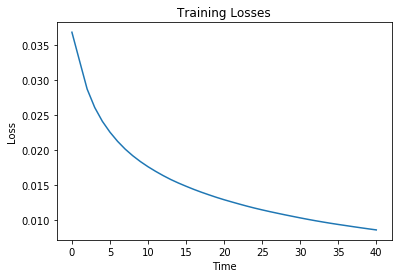

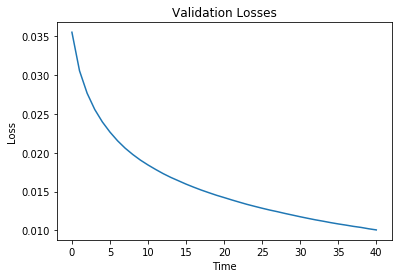

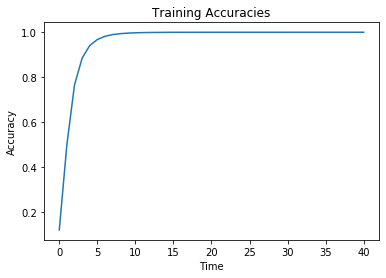

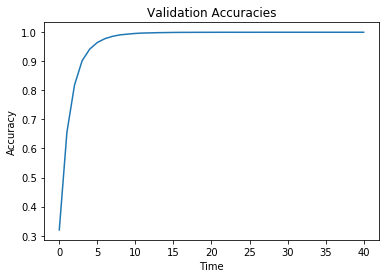

In [0]:
 def run():
  train_length = 16000
  validate_length = 4000
  size = 20
  dim = len(letters)
  scheme = 'enigma'
  batch_size = 100

  enigma_train_loader, enigma_validate_loader = getLoaders((train_length, validate_length), scheme, size, dim, batch_size, seed=False, mix=False)
  # model = MLPXXLarge(in_size=100*26, mid_size=100*26*5, out_size=100*26)
  model = MLPXLarge()

  scope(model, enigma_train_loader, enigma_validate_loader, 10000)
run()